In [14]:
#Import Libraries
# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')


In [15]:
# Load the CSV file
data = pd.read_csv('data/Telco-Customer-Churn.csv')

# Overview
print(data.head())
print(data.info())
print(data.describe())
print(data['Churn'].value_counts())


   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [16]:
#data cleaning

# Drop customerID column
data.drop('customerID', axis=1, inplace=True)

# Convert TotalCharges to numeric (coerce errors to NaN)
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# Fill missing TotalCharges with median
data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)


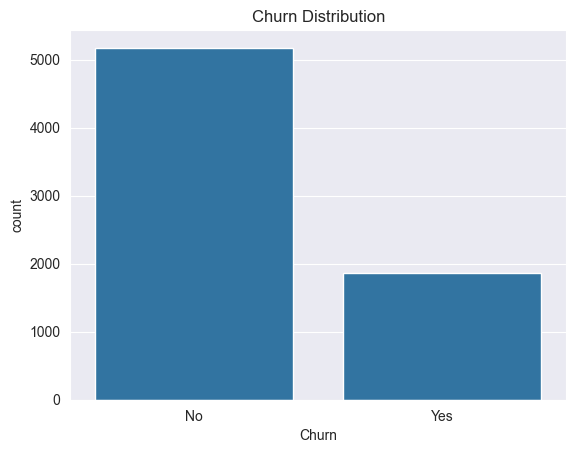

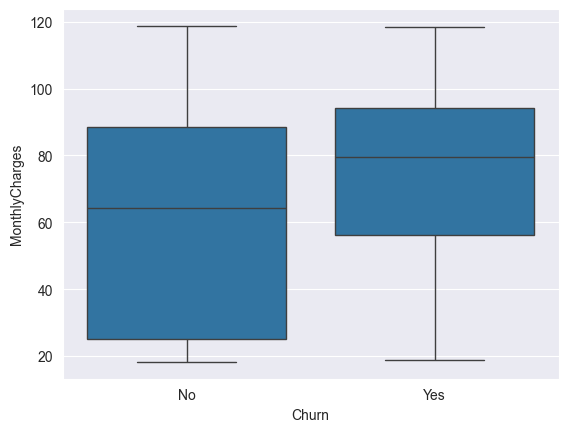

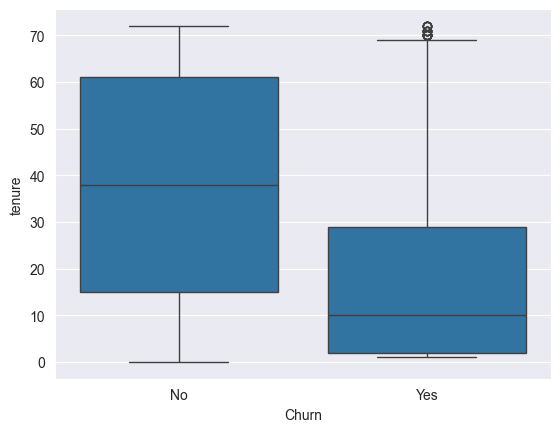

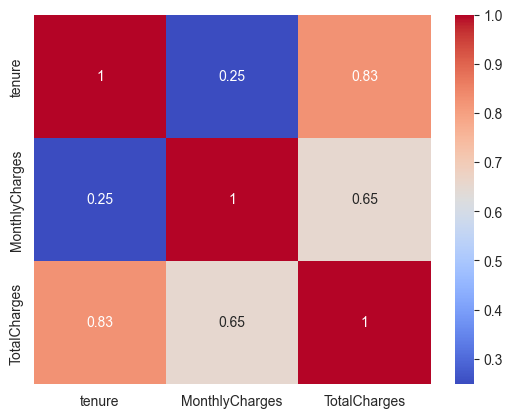

In [17]:
#Exploratory Data Analysis (EDA)

# Churn distribution
sns.countplot(x='Churn', data=data)
plt.title('Churn Distribution')
plt.show()

# Monthly Charges vs Churn
sns.boxplot(x='Churn', y='MonthlyCharges', data=data)
plt.show()

# Tenure vs Churn
sns.boxplot(x='Churn', y='tenure', data=data)
plt.show()

# Correlation heatmap for numeric features
numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
sns.heatmap(data[numeric_features].corr(), annot=True, cmap='coolwarm')
plt.show()


In [21]:
# Encode categorical variables
cat_cols = data.select_dtypes(include='object').columns.tolist()

# Remove 'Churn' if it exists in cat_cols
if 'Churn' in cat_cols:
    cat_cols.remove('Churn')  # target column

# Encode all categorical columns
for col in cat_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

# Encode target variable (ensure it's numeric)
if data['Churn'].dtype == 'object':
    data['Churn'] = data['Churn'].map({'Yes':1, 'No':0})


In [22]:
#Decision tree model

# Initialize and train Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluation
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 0.7253371185237757
Confusion Matrix:
 [[833 203]
 [184 189]]
              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1036
           1       0.48      0.51      0.49       373

    accuracy                           0.73      1409
   macro avg       0.65      0.66      0.65      1409
weighted avg       0.73      0.73      0.73      1409



In [28]:
#Neural network

# Build Neural Network model
nn_model = Sequential()
nn_model.add(Dense(32, input_dim=X_train_scaled.shape[1], activation='relu'))
nn_model.add(Dropout(0.2))
nn_model.add(Dense(16, activation='relu'))
nn_model.add(Dense(1, activation='sigmoid'))

# Compile model
nn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train model
history = nn_model.fit(
    X_train_scaled, y_train,
    epochs=50, batch_size=32,
    validation_split=0.2, verbose=1
)

# Predictions
y_pred_nn = (nn_model.predict(X_test_scaled) > 0.5).astype(int)

# Evaluation
print("Neural Network Accuracy:", accuracy_score(y_test, y_pred_nn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nn))
print(classification_report(y_test, y_pred_nn))


Epoch 1/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7176 - loss: 0.5455 - val_accuracy: 0.7826 - val_loss: 0.4430
Epoch 2/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7684 - loss: 0.4636 - val_accuracy: 0.8030 - val_loss: 0.4269
Epoch 3/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7790 - loss: 0.4495 - val_accuracy: 0.8004 - val_loss: 0.4217
Epoch 4/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7903 - loss: 0.4370 - val_accuracy: 0.8048 - val_loss: 0.4193
Epoch 5/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7948 - loss: 0.4341 - val_accuracy: 0.7986 - val_loss: 0.4176
Epoch 6/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7937 - loss: 0.4323 - val_accuracy: 0.8004 - val_loss: 0.4170
Epoch 7/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7914 - loss: 0.4294 - val_accuracy: 0.8021 - val_loss: 0.4139
Epoch 8/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7994 - loss: 0.4272 - val_accuracy: 0.

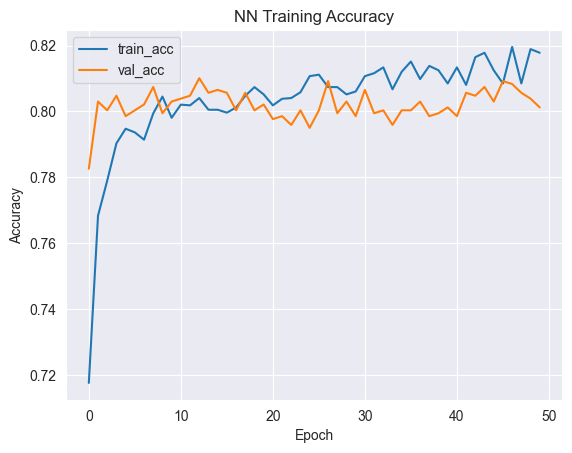

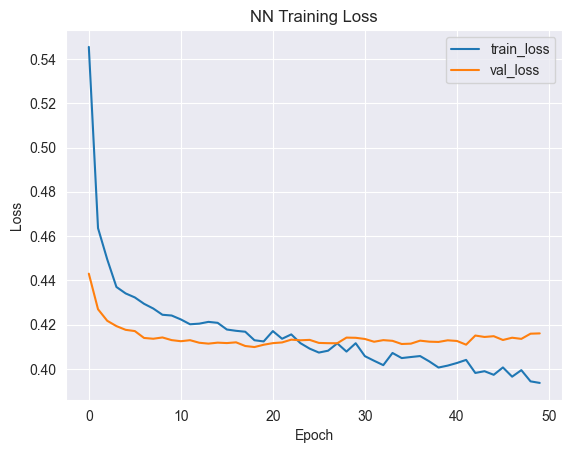

In [29]:
#Plot nueral network training history

# Accuracy plot
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title('NN Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss plot
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('NN Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [30]:
#ROC-AUC Comparison

# ROC-AUC for Decision Tree and Neural Network
print("Decision Tree ROC-AUC:", roc_auc_score(y_test, dt_model.predict_proba(X_test)[:,1]))
print("Neural Network ROC-AUC:", roc_auc_score(y_test, y_pred_nn))



Decision Tree ROC-AUC: 0.6570603061889926
Neural Network ROC-AUC: 0.739994255074684


In [31]:
# Save Decision Tree model
joblib.dump(dt_model, '../results/dt_model.pkl')

# Save Scaler
joblib.dump(scaler, '../results/scaler.pkl')

# Save Neural Network model in .keras format
nn_model.save('../results/nn_model.keras')
